# Analysis of Results from User Study of MLProvLab

This Jupyter Notebook presents the results from the user evaluation study of MLProvLab (https://github.com/fusion-jena/MLProvLab/). The notebook analyses the dataset from the user evaluation which provides information on the impression of MLProvLab and test how the provenance management helps users understand the notebooks. This dataset consists of 26 questions grouped in 6 sections. We analyse each question in the following cells.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib
from pathlib import Path


In [2]:
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
Path("./outputs").mkdir(exist_ok=True)

In [3]:
# Read the results csv dataset
csv_file='processed_results.csv'
df = pd.read_csv(csv_file)

In [4]:
participant_count = len(df)
print('Total participants for final analysis:{}'.format(participant_count))

Total participants for final analysis:15


In [5]:
# Show the first five rows of the dataset
df.head(5)

,Response ID,Date started,Date last action,"[Yes, I have read the privacy policy and agree./ Ja, ich habe die Datenschutzerklärung gelesen und stimme zu.]",What is your current domain?,What is your current domain? [Other],What is your current position?,What is your current position? [Other],Do you use Jupyter Notebooks in your work?,Do you use Machine Learning in your work?,...,Question time: celldependency,Question time: accuracyscore,Question time: splitratio,Group time: General Impression of MLProvLab,Question time: moduleslike,Question time: navigation,Question time: likemlprovlab,Question time: likeability,Question time: description,Question time: features
0,11,2021-07-21 05:36:07,2021-07-21 06:01:54,Yes,Computer Science,NaN,Master Student,NaN,Yes,Yes,...,NaN,NaN,NaN,152.08,NaN,NaN,NaN,NaN,NaN,NaN
1,14,2021-07-21 11:26:51,2021-07-21 11:48:52,Yes,Computer Science,NaN,PhD Student,NaN,No,No,...,NaN,NaN,NaN,161.39,NaN,NaN,NaN,NaN,NaN,NaN
2,17,2021-07-22 11:43:10,2021-07-22 12:07:22,Yes,Computer Science,NaN,Undergraduate Student,NaN,Sometimes,No,...,NaN,NaN,NaN,251.33,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2021-07-22 15:00:26,2021-07-22 15:03:16,Yes,Computer Science,NaN,Undergraduate Student,NaN,No,No,...,NaN,NaN,NaN,66.71,NaN,NaN,NaN,NaN,NaN,NaN
4,24,2021-07-24 18:56:09,2021-07-24 19:46:13,Yes,Computer Science,NaN,Undergraduate Student,NaN,No,No,...,NaN,NaN,NaN,603.55,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Set the configurations for the chart
fontsize = 14
chart_color = "#1565C0"
colors = ['#2196F3','#90CAF9', '#E3F2FD', '#64B5F6', '#B2EBF2', '#01579B', '#2962FF']

In [7]:
# Function to draw chart provided the column title
def draw_bar_chart(title, df=df):
    ax = df[title].value_counts().plot(kind="bar", figsize=(15,7), color=chart_color, title=title)    
    plt.xticks(fontsize=fontsize)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])
    total = len(df[title])
    # This loop adds the annotations
    for p in ax.patches:        
        percentage = '{:0.2f}%'.format(100 * float(p.get_height())/total)
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(percentage, (x, y + height + 0.2), fontsize=14)
    plt.savefig('./outputs/' + title + '.png', bbox_inches='tight')

In [8]:
# Function to draw chart with multiple columns provided the column title
def draw_bar_chart_mul_col(column_array, title, df=df):
    df1 = pd.DataFrame(df[column_array]) 
    ax = df1.apply(pd.Series.value_counts, dropna=True).plot(kind="bar", figsize=(15,9), zorder=2, width=0.8, title=title)
    ax.legend(loc='best')    
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    plt.xticks(fontsize=fontsize)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.savefig('./outputs/' + title + '.png', bbox_inches='tight')

In [9]:
# Function to draw pie chart provided the title
def draw_pie_chart(title, df=df):  
    labels = df[title].value_counts().index
    fig, ax1 = plt.subplots(figsize = (7,7)) 
    ax1.pie(df[title].value_counts(), autopct = '%0.2f%%', colors=colors, textprops={'fontsize': 14})
    ax1.legend(labels, loc = "upper right") 
    plt.title(title, bbox={'facecolor':'1.0', 'pad':5})
    plt.tight_layout()
    plt.savefig('./outputs/' + title + '.png', bbox_inches='tight')
    plt.show()

In [10]:
def draw_pie_chart_eval_quest(title, labels, df):    
    #labels = df.value_counts().index
    fig, ax1 = plt.subplots(figsize = (7,7)) 
    ax1.pie(df.value_counts(), autopct = '%0.0f%%', colors=colors, textprops={'fontsize': 14})
    ax1.legend(labels, loc = "upper right") 
    plt.title(title, bbox={'facecolor':'1.0', 'pad':5})
    plt.tight_layout()
    plt.show()

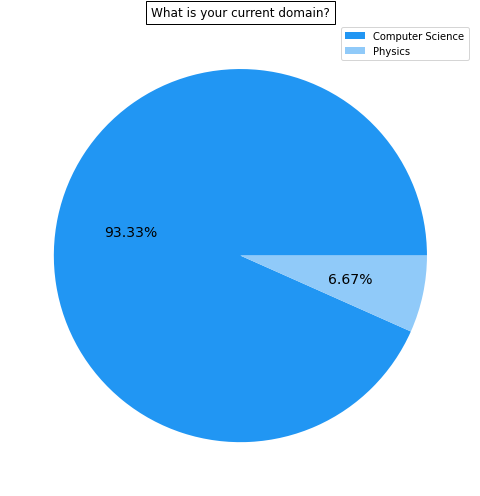

In [11]:
# What is your current domain?
draw_pie_chart('What is your current domain?')

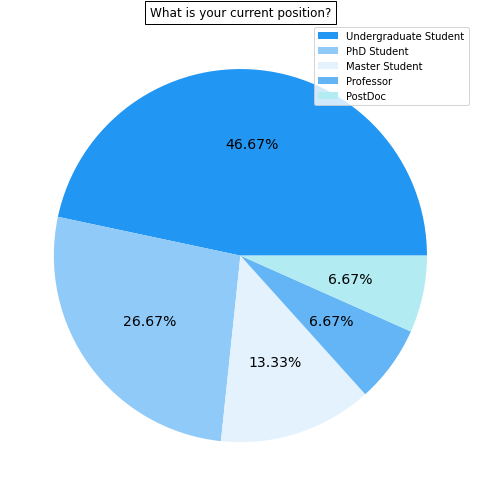

In [12]:
# What is your current position?
draw_pie_chart('What is your current position?')

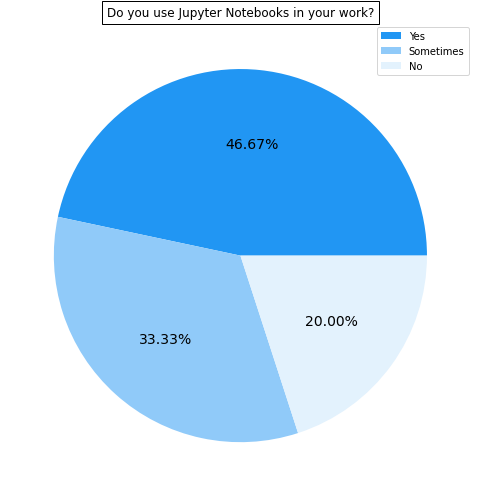

In [13]:
# What is your current position?
draw_pie_chart('Do you use Jupyter Notebooks in your work?')

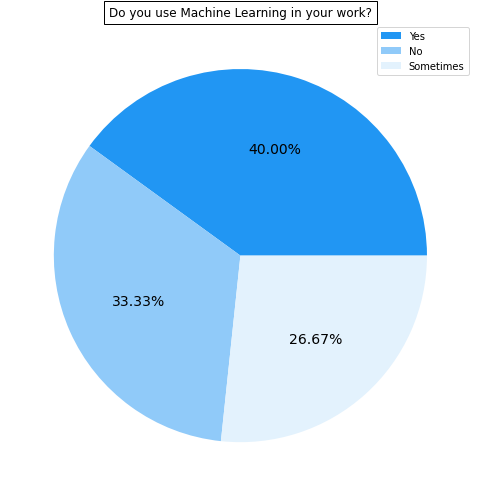

In [14]:
# Do you use Machine Learning in your work?
draw_pie_chart('Do you use Machine Learning in your work?')

In [15]:
# Specify the right answer for each question
right_answers = {
    "kernel": ["SQ001"],
    "modules": ["SQ001", "SQ003", "SQ004", "SQ005", "SQ006", "SQ007"],
    "notused": ["SQ001"],
    "mostused": ["SQ004"],
    "datasource": ["SQ001", "SQ002", "SQ003"],
    "epoch": ["SQ002"],
    "seaborn": ["SQ003"],
    "python": ["SQ003"],
    "executedtime": "Thu, 24 Jun 2021 10:26:21 GMT",
    "anydifference": "No",
    "celldependency": ["SQ002", "SQ004", "SQ005"],
    "accuracyscore": 0.96,
    "splitratio": "No",
}

In [16]:
labels = ['Correct', 'Incorrect']

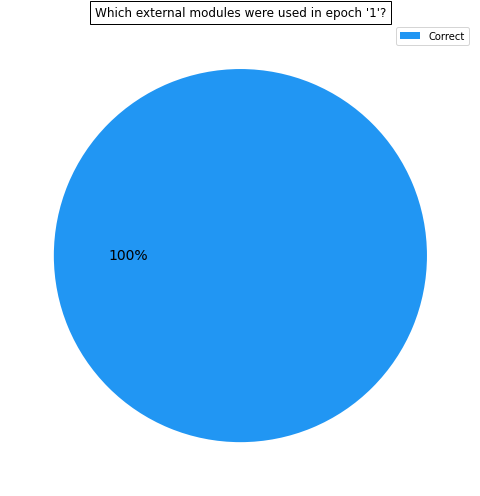

,7.22.0,6.33.1,5.45.3
No,NaN,15.0,15.0
Yes,15.0,NaN,NaN


In [17]:
# Q1
df_q1 = df.loc[:, "Which version of the kernel was used in epoch '1'? [7.22.0]":"Which version of the kernel was used in epoch '1'? [5.45.3]"]
df_q1.columns = ['7.22.0', '6.33.1', '5.45.3']
k = ((df_q1["7.22.0"]=='Yes') & (df_q1["6.33.1"]=='No') & (df_q1["5.45.3"]=='No'))
title = "Which external modules were used in epoch '1'?"
draw_pie_chart_eval_quest(title, labels, k)
df_q1.apply(pd.Series.value_counts)

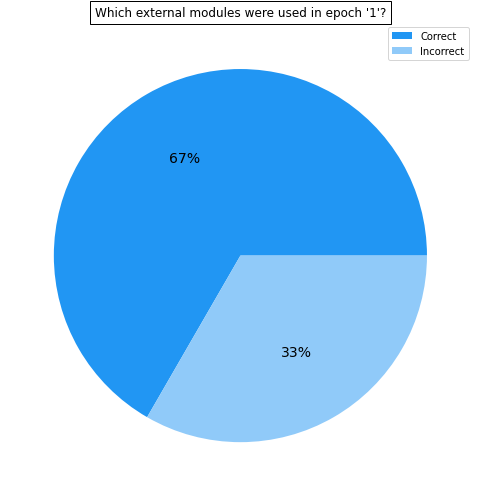

,matplotlib,keras,os,pandas,sklearn,numpy,seaborn,tensorflow
No,2,15.0,3,2,3,1,3,15.0
Yes,13,NaN,12,13,12,14,12,NaN


In [18]:
# Q2
df_q2 = df.loc[:, "Which external modules were used in epoch '1'? [matplotlib]":"Which external modules were used in epoch '1'? [tensorflow]"]
df_q2.columns = ['matplotlib', 'keras', 'os', 'pandas','sklearn', 'numpy', 'seaborn','tensorflow']

k=((df_q2["matplotlib"]=='Yes') & (df_q2["keras"]=='No') & (df_q2["os"]=='Yes') & (df_q2["pandas"]=='Yes') &  (df_q2["sklearn"]=='Yes') &  (df_q2["numpy"]=='Yes') &  (df_q2["seaborn"]=='Yes') &  (df_q2["tensorflow"]=='No'))
title = "Which external modules were used in epoch '1'?"
labels = ['Correct', 'Incorrect']
draw_pie_chart_eval_quest(title, labels, k)
df_q2.apply(pd.Series.value_counts)

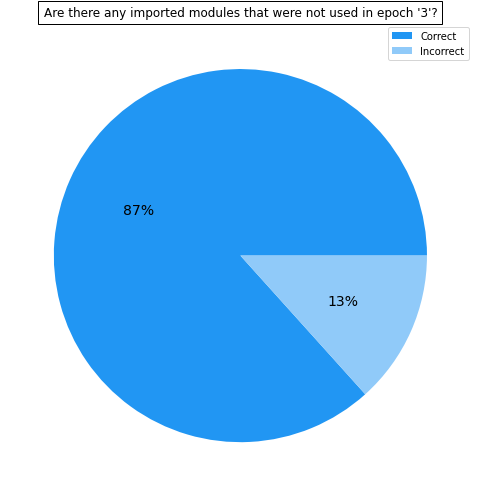

,numpy,os,pandas
No,2,15.0,15.0
Yes,13,NaN,NaN


In [19]:
# Q3
df_q3 = df.loc[:, "Are there any imported modules that were not used in epoch '3'? [numpy]":"Are there any imported modules that were not used in epoch '3'? [pandas]"]
df_q3.columns = ['numpy', 'os', 'pandas']
k = ((df_q3["numpy"]=='Yes') & (df_q3["os"]=='No') & (df_q3["pandas"]=='No'))
title = "Are there any imported modules that were not used in epoch '3'?"
draw_pie_chart_eval_quest(title, labels, k)
df_q3.apply(pd.Series.value_counts)

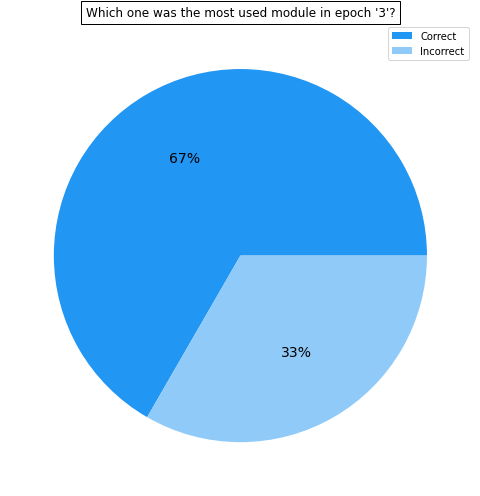

,os,seaborn,numpy,sklearn
No,12,12,13,5
Yes,3,3,2,10


In [20]:
# Q4
df_q4 = df.loc[:, "Which one was the most used module in epoch '3'? [os]":"Which one was the most used module in epoch '3'? [sklearn]"]
df_q4.columns = ['os', 'seaborn', 'numpy', 'sklearn']
k = ((df_q4["os"]=='No') & (df_q4["seaborn"]=='No') & (df_q4["numpy"]=='No') & (df_q4["sklearn"]=='Yes'))
title = "Which one was the most used module in epoch '3'?"
draw_pie_chart_eval_quest(title, labels, k)
df_q4.apply(pd.Series.value_counts)

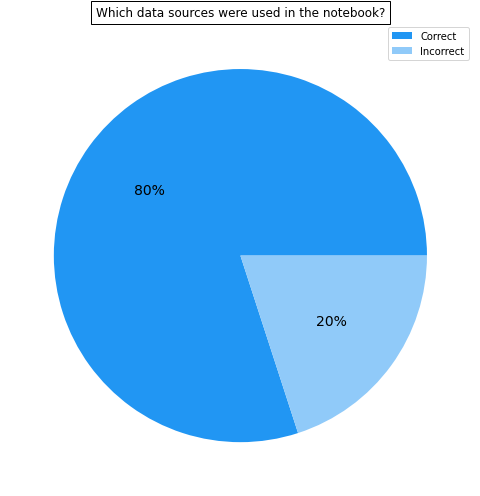

,[D:/Projects/mnist-evaluation/data/train.csv],[D:/Projects/mnist-evaluation/data/test.csv],[D:/Projects/mnist-evaluation/data]
Yes,13,13,14
No,2,2,1


In [21]:
# Q5
df_q5 = df.loc[:, 'Which data sources were used in the notebook? [D:/Projects/mnist-evaluation/data/train.csv]':'Which data sources were used in the notebook? [D:/Projects/mnist-evaluation/data]']
df_q5.columns = ['[D:/Projects/mnist-evaluation/data/train.csv]', '[D:/Projects/mnist-evaluation/data/test.csv]', '[D:/Projects/mnist-evaluation/data]']
k = ((df_q5["[D:/Projects/mnist-evaluation/data/train.csv]"]=='Yes') & (df_q5["[D:/Projects/mnist-evaluation/data/test.csv]"]=='Yes')  & (df_q5["[D:/Projects/mnist-evaluation/data]"]=='Yes'))
title = "Which data sources were used in the notebook?"
draw_pie_chart_eval_quest(title, labels, k)
df_q5.apply(pd.Series.value_counts)

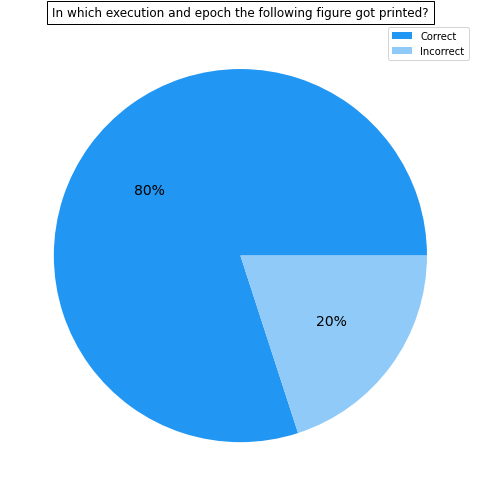

,Epoch: 2 | Execution: 6,Epoch: 1 | Execution: 10,Epoch: 3 | Execution: 9
No,15.0,3,14
Yes,NaN,12,1


In [22]:
# Q6
df_q6 = df.loc[:, 'In which execution and epoch the following figure got printed? [Epoch: 2 | Execution: 6]': 'In which execution and epoch the following figure got printed? [Epoch: 3 | Execution: 9]']
df_q6.columns = ['Epoch: 2 | Execution: 6', 'Epoch: 1 | Execution: 10', 'Epoch: 3 | Execution: 9']
k = ((df_q6["Epoch: 2 | Execution: 6"]=='No') & (df_q6["Epoch: 1 | Execution: 10"]=='Yes') & (df_q6["Epoch: 3 | Execution: 9"]=='No'))
title = "In which execution and epoch the following figure got printed?"
draw_pie_chart_eval_quest(title, labels, k)
df_q6.apply(pd.Series.value_counts)

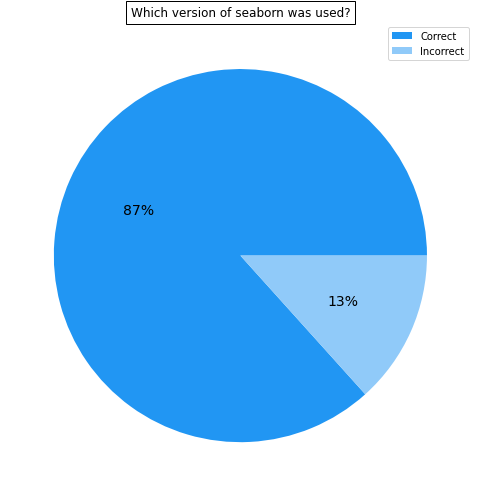

,0.11.5,0.12.1,0.11.1,0.10.5
No,15.0,15.0,2,15.0
Yes,NaN,NaN,13,NaN


In [23]:
# Q7
df_q7 = df.loc[:,  'Which version of seaborn was used? [0.11.5]':'Which version of seaborn was used? [0.10.5]']
df_q7.columns = ['0.11.5', '0.12.1', '0.11.1', '0.10.5']
k = ((df_q7["0.11.5"]=='No') & (df_q7["0.12.1"]=='No') & (df_q7["0.11.1"]=='Yes') & (df_q7["0.10.5"]=='No'))
title = "Which version of seaborn was used?"
draw_pie_chart_eval_quest(title, labels, k)
df_q7.apply(pd.Series.value_counts)

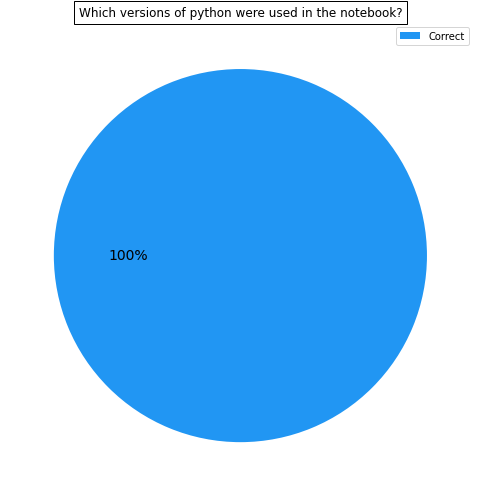

,2.9.1,3.9.2,3.7.6
No,15.0,NaN,15.0
Yes,NaN,15.0,NaN


In [24]:
# Q8
df_q8 = df.loc[:, 'Which versions of python were used in the notebook? [2.9.1]':'Which versions of python were used in the notebook? [3.7.6]']
df_q8.columns = ['2.9.1', '3.9.2', '3.7.6']
k = ((df_q8["2.9.1"]=='No') & (df_q8["3.9.2"]=='Yes') & (df_q8["3.7.6"]=='No'))
title = "Which versions of python were used in the notebook?"
draw_pie_chart_eval_quest(title, labels, k)
df_q8.apply(pd.Series.value_counts)

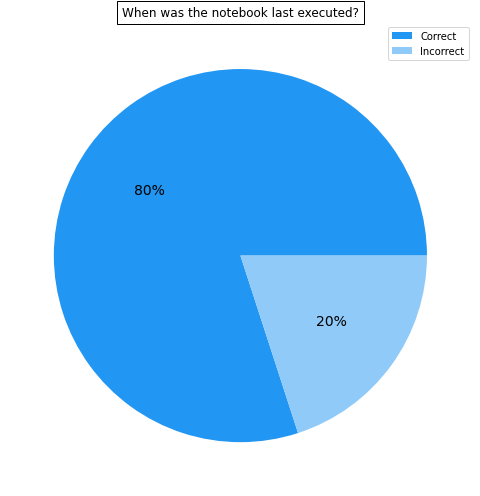

,When was the notebook last executed?
"Thu, 24 Jun 2021 10:26:21 GMT",12
"Thu, 24 Jun 2021 10:11:14 GMT",1
"Thu, 24 Jun 2021 09:57:28 GMT",1


In [25]:
# Q9
df_q9 = df['When was the notebook last executed?']
k=((df['When was the notebook last executed?']=="Thu, 24 Jun 2021 10:26:21 GMT") & (df['When was the notebook last executed?']!="Thu, 24 Jun 2021 09:57:28 GMT")& (df['When was the notebook last executed?']!="Thu, 24 Jun 2021 10:11:14 GMT"))
title = "When was the notebook last executed?"
draw_pie_chart_eval_quest(title, labels, k)
df_q9.value_counts().to_frame()

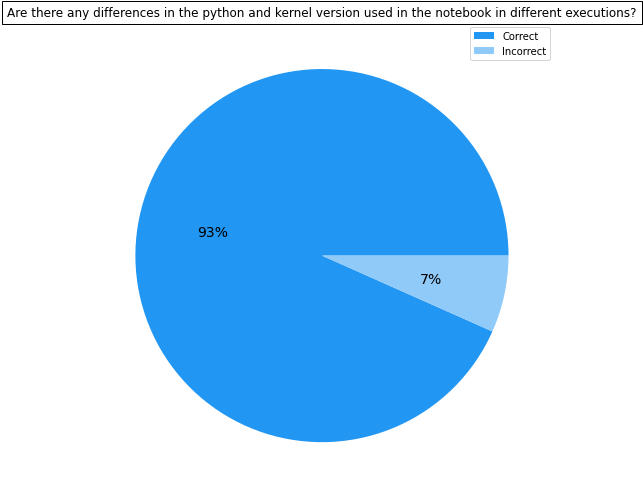

,Are there any differences in the python and kernel version used in the notebook in different executions?
No,14


In [26]:
# Q10
df_q10 = df['Are there any differences in the python and kernel version used in the notebook in different executions?']
k=((df['Are there any differences in the python and kernel version used in the notebook in different executions?']=='No') & (df['Are there any differences in the python and kernel version used in the notebook in different executions?']!="Yes"))
title = 'Are there any differences in the python and kernel version used in the notebook in different executions?'
draw_pie_chart_eval_quest(title, labels, k)
df_q10.value_counts().to_frame()

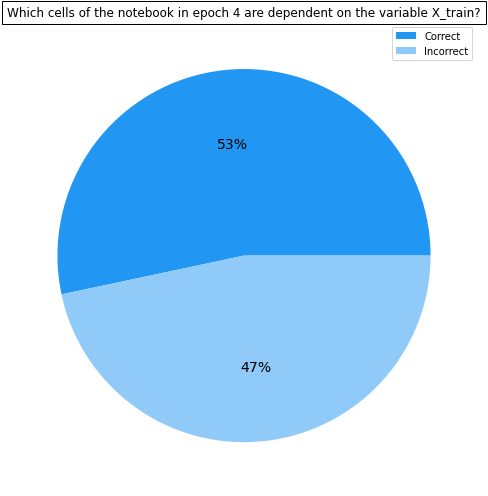

,Cell 1,Cell 13,Cell 14,Cell 15,Cell 16
No,12,5,15.0,5,6
Yes,3,10,NaN,10,9


In [27]:
# Q11
df_q11 = df.loc[:, "Which cells of the notebook in epoch '4' are dependent on the variable 'X_train'? [Cell 1]": "Which cells of the notebook in epoch '4' are dependent on the variable 'X_train'? [Cell 16]"]
df_q11.columns = ['Cell 1', 'Cell 13', 'Cell 14', 'Cell 15', 'Cell 16']
k = ((df_q11["Cell 1"]=='No') & (df_q11["Cell 13"]=='Yes') & (df_q11["Cell 14"]=='No') & (df_q11["Cell 15"]=='Yes') & (df_q11["Cell 16"]=='Yes'))
title = "Which cells of the notebook in epoch 4 are dependent on the variable X_train?"
draw_pie_chart_eval_quest(title, labels, k)
df_q11.apply(pd.Series.value_counts)

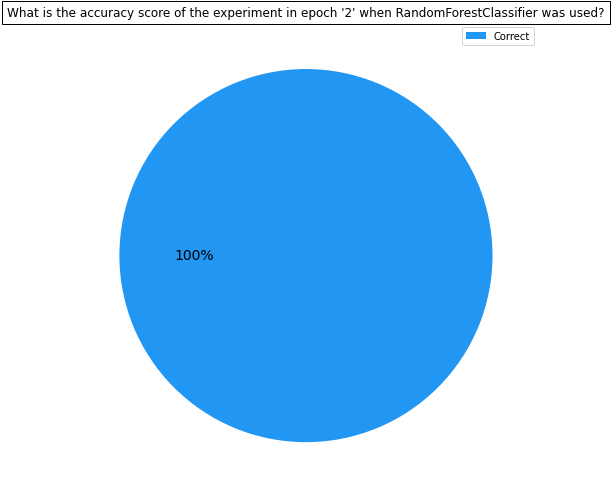

,What is the accuracy score of the experiment in epoch '2' when RandomForestClassifier was used?
0.96,13


In [28]:
# Q12
df_q12 = df["What is the accuracy score of the experiment in epoch '2' when RandomForestClassifier was used?"]
k=((df["What is the accuracy score of the experiment in epoch '2' when RandomForestClassifier was used?"]=='0.96') & (df["What is the accuracy score of the experiment in epoch '2' when RandomForestClassifier was used?"]!="0.56") 
   & (df["What is the accuracy score of the experiment in epoch '2' when RandomForestClassifier was used?"]!="0.75"))
title = "What is the accuracy score of the experiment in epoch '2' when RandomForestClassifier was used?"
draw_pie_chart_eval_quest(title, labels, k)
df_q12.value_counts().to_frame()

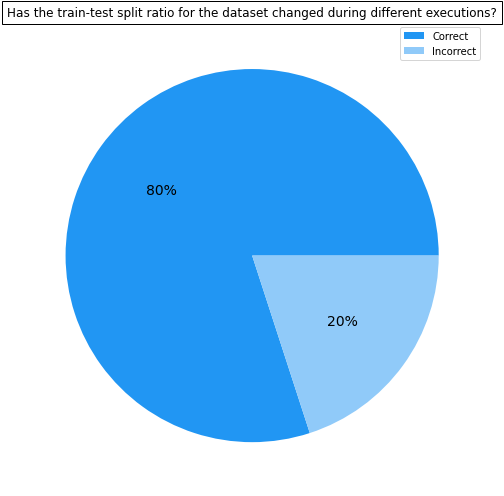

,Has the train-test split ratio for the dataset changed during different executions?
No,12
Yes,2


In [29]:
# Q13
df_q13 = df["Has the train-test split ratio for the dataset changed during different executions?"]
k=((df["Has the train-test split ratio for the dataset changed during different executions?"]=='No')  
   & (df["Has the train-test split ratio for the dataset changed during different executions?"]!="Yes"))
title = "Has the train-test split ratio for the dataset changed during different executions?"
draw_pie_chart_eval_quest(title, labels, k)
df_q13.value_counts().to_frame()

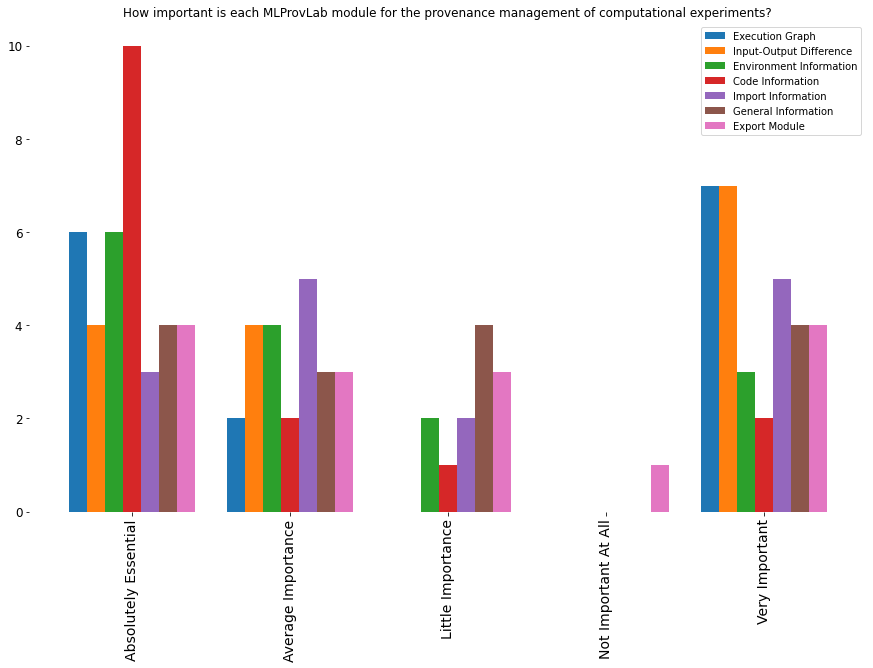

In [30]:
# How important is each MLProvLab module for the provenance management of computational experiments?
df1 = df.loc[:, 'How important is each MLProvLab module for the provenance management of computational experiments? [Execution Graph]':'How important is each MLProvLab module for the provenance management of computational experiments? [Export Module]']
column_array = ['Execution Graph', 'Input-Output Difference', 'Environment Information', 'Code Information', 'Import Information', 'General Information', 'Export Module']
df1.columns = column_array
title ='How important is each MLProvLab module for the provenance management of computational experiments?'
draw_bar_chart_mul_col(column_array, title, df1)

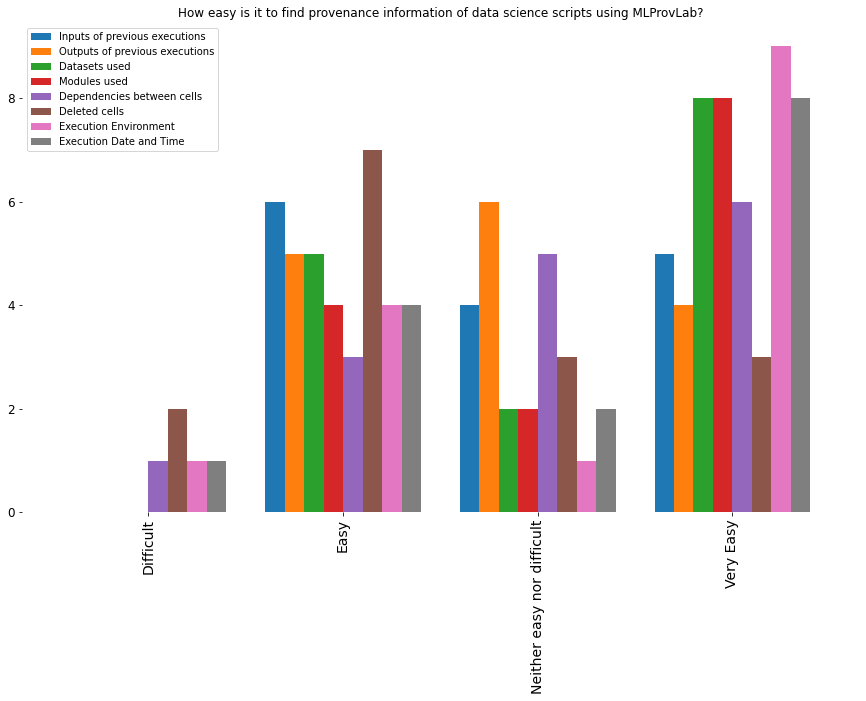

In [31]:
# How easy is it to find provenance information of data science scripts using MLProvLab?
df1 = df.loc[:, 'How easy is it to find provenance information of data science scripts using MLProvLab? [Inputs of previous executions]':'How easy is it to find provenance information of data science scripts using MLProvLab? [Execution Date and Time]']
column_array = ['Inputs of previous executions', 'Outputs of previous executions', 'Datasets used', 'Modules used', 'Dependencies between cells', 'Deleted cells', 'Execution Environment', 'Execution Date and Time']
df1.columns = column_array
title = 'How easy is it to find provenance information of data science scripts using MLProvLab?'
draw_bar_chart_mul_col(column_array, title, df1)

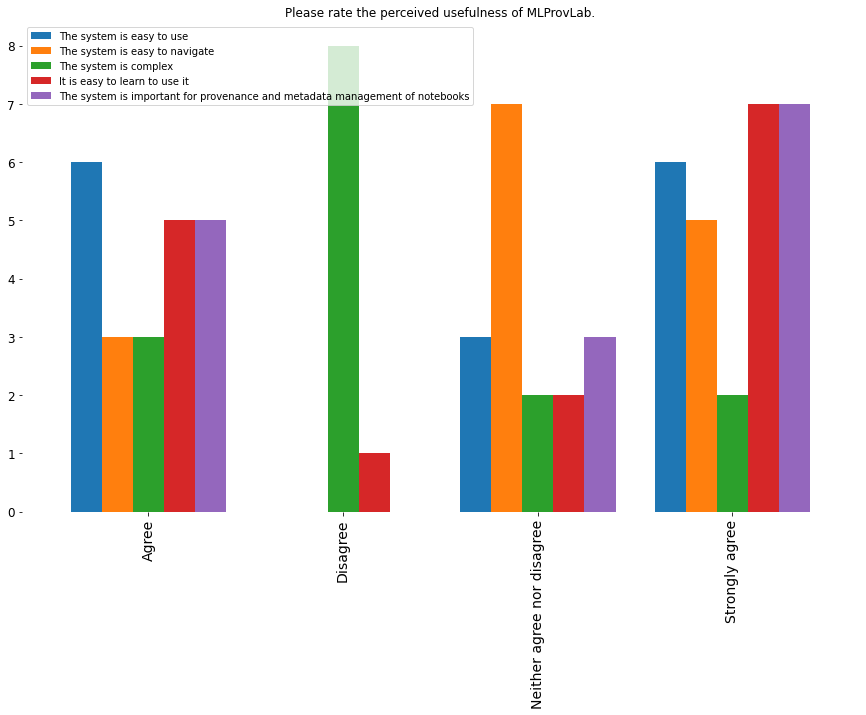

In [32]:
# Please rate the perceived usefulness of MLProvLab.
df1 = df.loc[:, 'Please rate the perceived usefulness of MLProvLab. [The system is easy to use]':'Please rate the perceived usefulness of MLProvLab. [The system is important for provenance and metadata management of notebooks]']
column_array =['The system is easy to use', 'The system is easy to navigate', 'The system is complex', 'It is easy to learn to use it', 'The system is important for provenance and metadata management of notebooks']
df1.columns = column_array
title = 'Please rate the perceived usefulness of MLProvLab.'
draw_bar_chart_mul_col(column_array, title, df1)

[8, 11, 11, 2]


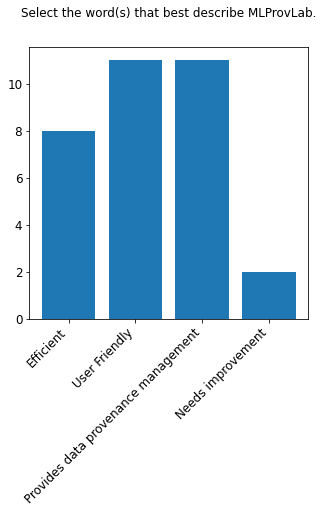

In [33]:
# Select the word(s) that best describe MLProvLab.
imported_data1 = df["Select the word(s) that best describe MLProvLab. [Efficient]"]
imported_data2 = df["Select the word(s) that best describe MLProvLab. [User Friendly]"]
imported_data3 = df["Select the word(s) that best describe MLProvLab. [Provides data provenance management]"]
imported_data4 = df["Select the word(s) that best describe MLProvLab. [Needs improvement]"]
other_data = df["Select the word(s) that best describe MLProvLab. [Other]"]

labels = ["Efficient", "User Friendly",
          "Provides data provenance management", "Needs improvement"]
counts = {"Efficient": 0, "User Friendly": 0,
          "Provides data provenance management": 0, "Needs improvement": 0}
sizes = []

for index, ValueError in enumerate(imported_data1):
    if "Yes" == imported_data1[index]:
        counts["Efficient"] += 1
    if "Yes" == imported_data2[index]:
        counts["User Friendly"] += 1
    if "Yes" == imported_data3[index]:
        counts["Provides data provenance management"] += 1
    if "Yes" == imported_data4[index]:
        counts["Needs improvement"] += 1

for label in labels:
    sizes.append(counts[label])
    
print(sizes)

plt.figure(figsize=(5,5))
plt.title("Select the word(s) that best describe MLProvLab.", pad=30)
plt.bar(labels, sizes)
plt.xticks(rotation=45, ha='right')
plt.savefig('./outputs/words_describe.png', bbox_inches='tight')
plt.show()


In [34]:
# What new features or changes would you like to see in MLProvLab ?
print('What new features or changes would you like to see in MLProvLab ?')
df['What new features or changes would you like to see in MLProvLab ?'].value_counts()

What new features or changes would you like to see in MLProvLab ?


Some tabs like "Import info" and "General info" could need a different name as they currently can be missinterpreted. Something like "Imports used" and "External data" would probably be less missleading.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1
1. Putting the export Button to the right of "Help" would make it less likely to accidentaly click it when you didn't mean to (possibly important for this button because it downloads a file).\n\n2. When looking at the code info tab, it's not immediately obvious what I'm looking at because I don't have a relation betwe